# Common mistake when plotting ROC Curves

## Build logistic regression model with random data

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
from sklearn.linear_model import LogisticRegression

X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0)

clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

## Correct way 1. Just let SKLearn do the work.

In [41]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

## Correct way 2: Use predict_proba function.
Many interviewees think that the right thing to do is to use the `predict` function (shown below) because they believe this will output the probability estimates for each row. The `predict` function outputs the predicted class, not the probabilities.

### Predicted probabilities (correct)

In [45]:
pred_probabilities = clf.predict_proba(X_test)
pred_probabilities[:, 1]

array([0.987449  , 0.02998171, 0.93304347, 0.0046666 , 0.18585878,
       0.68398386, 0.99505453, 0.11870383, 0.52920198, 0.8227466 ,
       0.99924972, 0.03340925, 0.0402157 , 0.17996495, 0.14772681,
       0.97940836, 0.00124246, 0.33856234, 0.99999987, 0.9998645 ,
       0.77046167, 0.02759606, 0.91156045, 0.00657165, 0.36070878])

### Predicted classes (Probably not what you want)

In [11]:
pred_class = clf.predict(X_test)
pred_class

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

## Manually plot ROC Curve

### Correct. Use predicted probabilities

In [49]:
# From:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve, auc

# Correct: Use probabilities.
y_score = pred_probabilities[:, 1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# for i in range(n_classes):
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Wrong: Don't use predicted classes

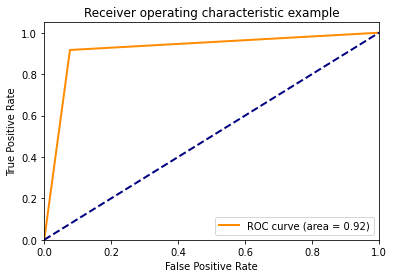

In [52]:
# Not correct. Use probability estimates, not predicted classes.
y_score = pred_class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# for i in range(n_classes):
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()